In [34]:
import pandas as pd


df = pd.read_csv('../data/problem-dataset-with-11-cluster.csv').set_index('name')

In [116]:
import numpy as np
def remove_percentage(percentage_value):
    if(type(percentage_value) == int or type(percentage_value) == float):
        return percentage_value
    try:
        return float(percentage_value.strip('%'))
    except ValueError:
        # If the input value is not a valid percentage, return None or raise an exception, depending on your requirements
        return np.NaN

In [120]:
import re
def processName(name):
    id = re.sub(r'^\d+\.\s*', '', name)
    id = id.lower()
    id = id.strip()
    id = id.replace(" ", "-")
    return id

In [ ]:
# dummy = pd.read_csv('../data/problem_dataset.csv').set_index('Unnamed: 0')


In [121]:
# dummy['name'] = dummy['name'].apply(lambda x : processName(x))

In [123]:

# dummy.to_csv('../data/problem_dataset.csv')

In [2]:
import numpy as np

In [48]:
import numpy as np

topics = []
for _, row in df.iterrows():
    if type(row['topics']) == str:
        topics += row['topics'].split(',')
    else:
        print(type(row['topics']), row['topics'])

In [ ]:
df.isna

In [36]:
df.isna().sum()

difficulty            0
link                  0
acceptance-rate       0
submissions           0
likes                 0
description           0
topics                0
companies           320
cluster               0
difficulty_score      0
dtype: int64

In [49]:
unique_topics = np.unique(topics)

In [50]:
unique_topics

array(['array', 'backtracking', 'biconnected-component',
       'binary-indexed-tree', 'binary-search', 'binary-search-tree',
       'binary-tree', 'bit-manipulation', 'bitmask', 'brainteaser',
       'breadth-first-search', 'bucket-sort', 'combinatorics',
       'concurrency', 'counting', 'counting-sort', 'data-stream',
       'database', 'depth-first-search', 'design', 'divide-and-conquer',
       'doubly-linked-list', 'dynamic-programming', 'enumeration',
       'eulerian-circuit', 'game-theory', 'geometry', 'graph', 'greedy',
       'hash-function', 'hash-table', 'interactive', 'iterator',
       'line-sweep', 'linked-list', 'math', 'matrix', 'memoization',
       'merge-sort', 'minimum-spanning-tree', 'monotonic-queue',
       'monotonic-stack', 'number-theory', 'ordered-set', 'prefix-sum',
       'probability-and-statistics', 'queue', 'quickselect', 'radix-sort',
       'randomized', 'recursion', 'rejection-sampling',
       'reservoir-sampling', 'rolling-hash', 'segment-tree', '

In [37]:
dif_df =  df[df['topics'].notna()]

In [9]:
dif_df = dif_df[dif_df['acceptance-rate'] != 0]

In [10]:
dif_df[dif_df['acceptance-rate'] == 0].count()

id                    0
accepted-solutions    0
submissions           0
acceptance-rate       0
topics                0
companies             0
likes                 0
no-of-comments        0
difficulty-level      0
dtype: int64

In [11]:
(dif_df['acceptance-rate'] == 0).sum()

0

In [38]:
final_df = dif_df[dif_df['acceptance-rate'].notna()]

In [60]:
data = []
for _, row in final_df.iterrows():
    if row['acceptance-rate'] is np.NaN:
        print('prob')
    if not row['acceptance-rate'] or row['acceptance-rate'] == 0: continue

    prob = np.zeros(71)

    prob[0] = row['difficulty_score']

    for topic in row['topics'].split(','):
        x = np.where(unique_topics == topic)
        prob[x[0][0] + 1] = 1

    data.append(prob)


In [61]:
data = np.array(data)

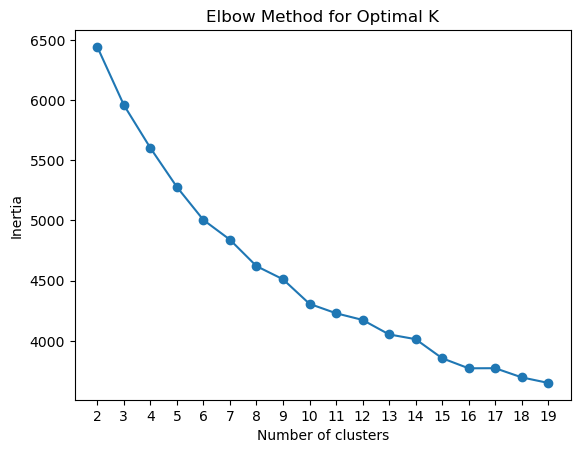

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Define a range of k values (number of clusters) to evaluate
k_values = range(2, 20)

# Initialize list to store inertia values
inertia_values = []

# Perform k-means clustering for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_values)
plt.show()


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

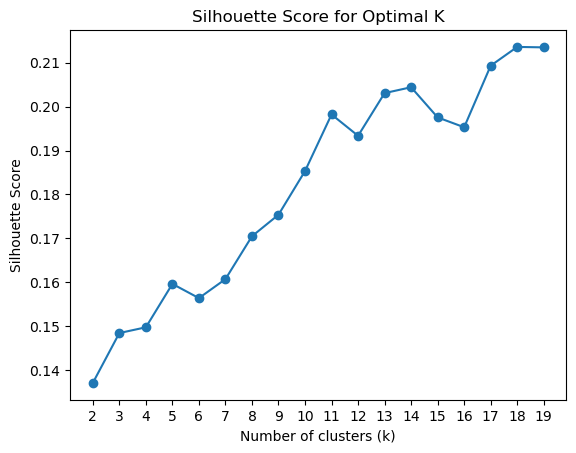

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples


# Define a range of k values (number of clusters) to evaluate
k_values = range(2, 20)

# Initialize lists to store silhouette scores and sample silhouettes
silhouette_scores = []
sample_silhouettes = []

# Iterate over each value of k
for k in k_values:
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(data)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    # Calculate silhouette samples for each data point
    sample_silhouette_values = silhouette_samples(data, cluster_labels)
    sample_silhouettes.append(sample_silhouette_values)
    
# Plot silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.xticks(k_values)
plt.show()

# # Plot silhouette samples for a specific value of k (e.g., k=4)
# k_index = 2  # Index of k value in k_values list (e.g., 4 clusters -> index 2)
# plt.figure(figsize=(10, 6))
# plt.title(f"Silhouette Plot for k={k_values[k_index]}")
# plt.xlabel("Silhouette coefficient values")
# plt.ylabel("Sample index")
# y_lower = 10
# for i in range(k_values[k_index]):
#     # Aggregate silhouette scores for samples belonging to cluster i and sort them
#     ith_cluster_silhouette_values = [sample_silhouette_values[j] for j, label in enumerate(cluster_labels) if label == i]
#     ith_cluster_silhouette_values.sort()
#     size_cluster_i = len(ith_cluster_silhouette_values)
#     y_upper = y_lower + size_cluster_i
#     color = plt.cm.tab10(float(i) / k_values[k_index])
#     plt.fill_betweenx(np.arange(y_lower, y_upper),
#                       0, ith_cluster_silhouette_values,
#                       facecolor=color, edgecolor=color, alpha=0.7)
#     plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
#     y_lower = y_upper + 10
# plt.axvline(x=silhouette_scores[k_index], color="red", linestyle="--")
# plt.yticks([])
# plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
# plt.show()


In [65]:
data.shape

(2833, 72)

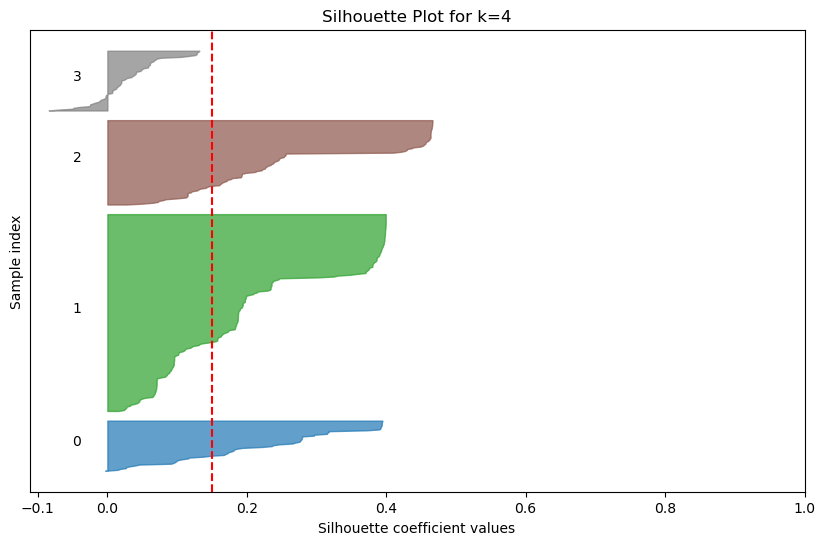

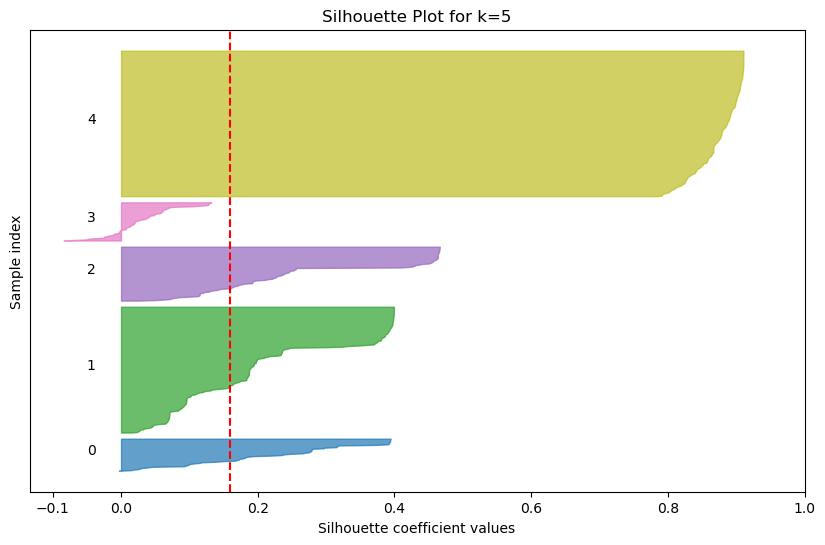

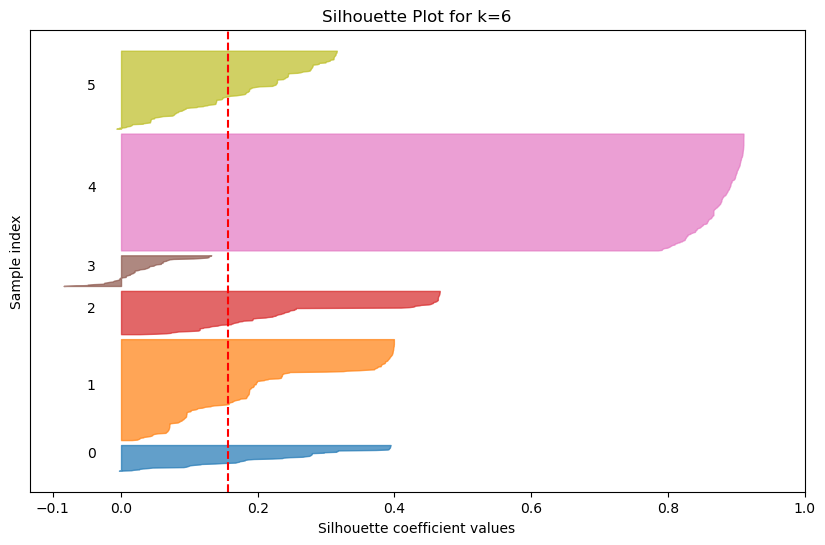

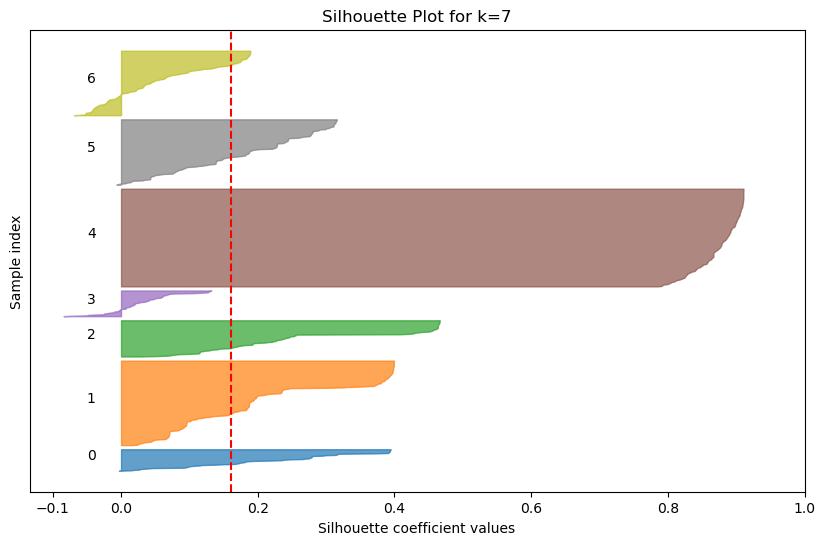

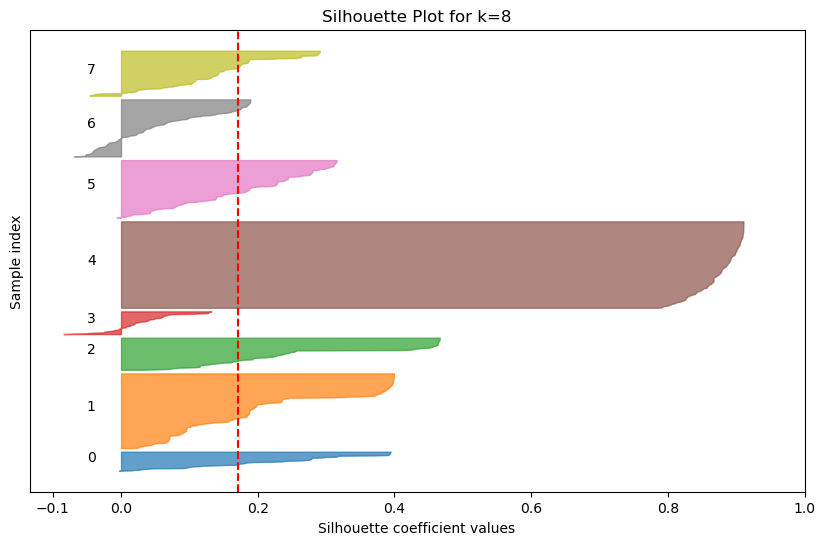

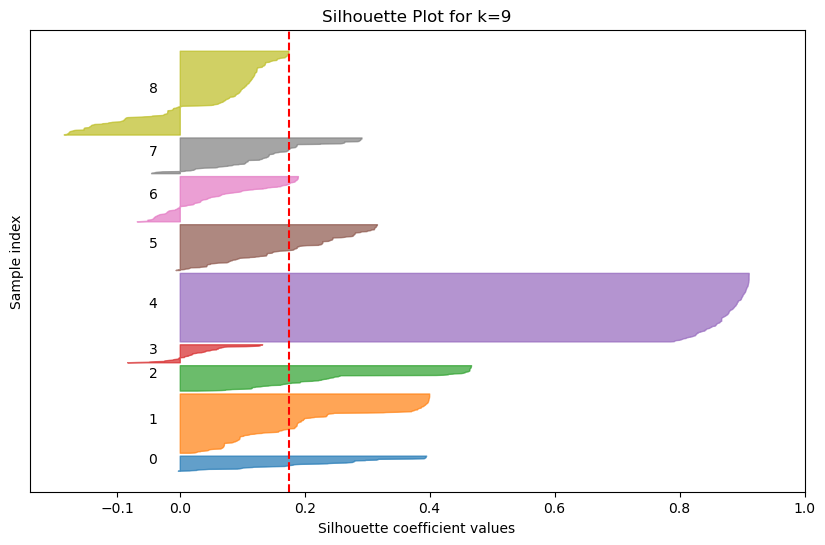

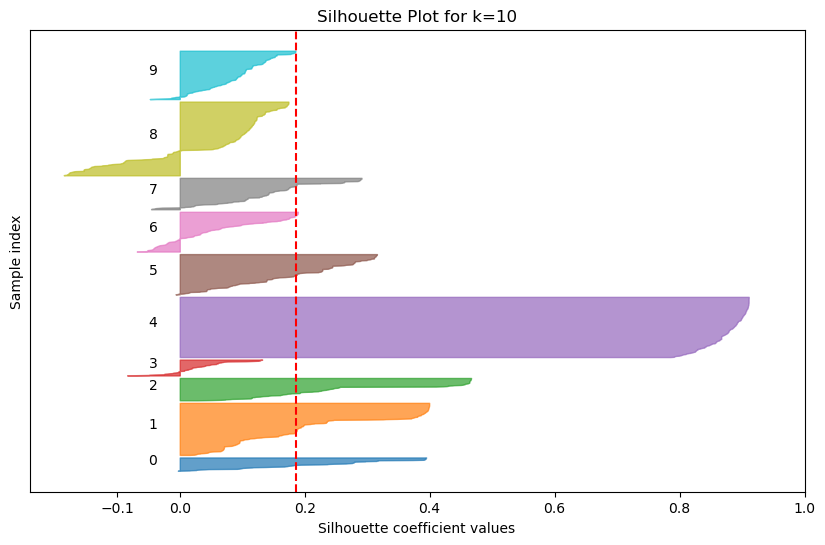

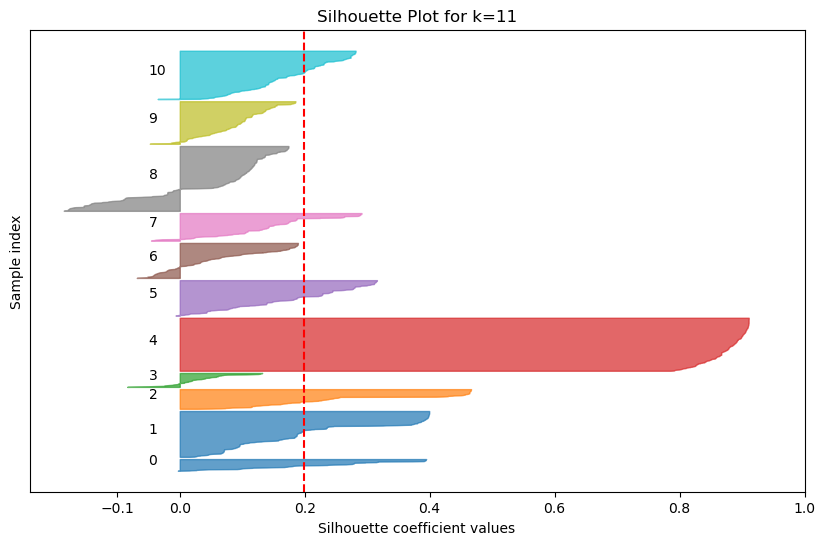

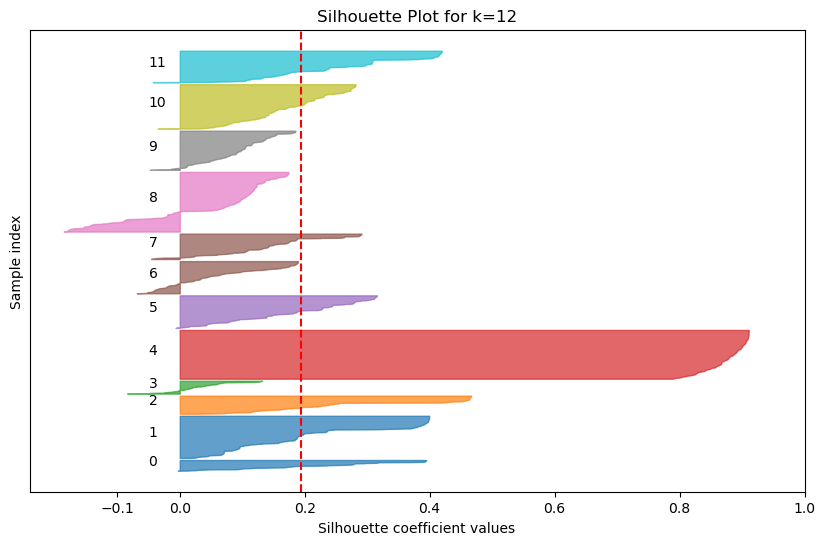

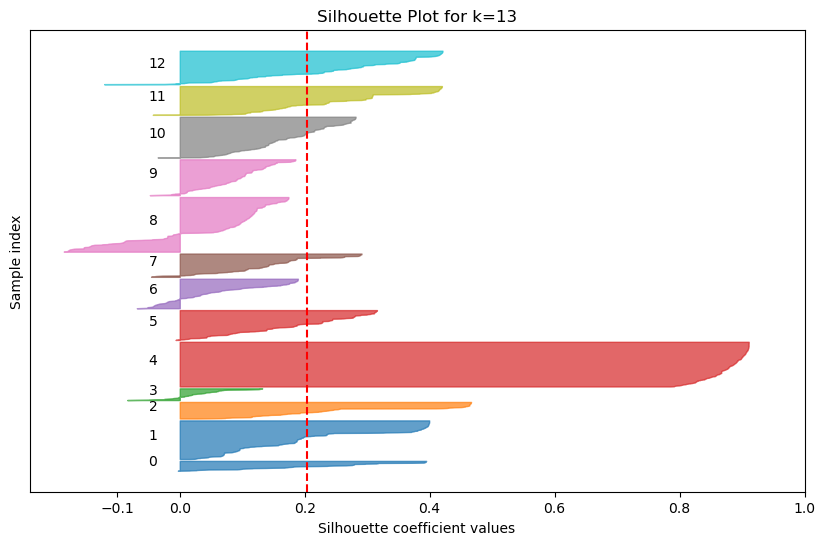

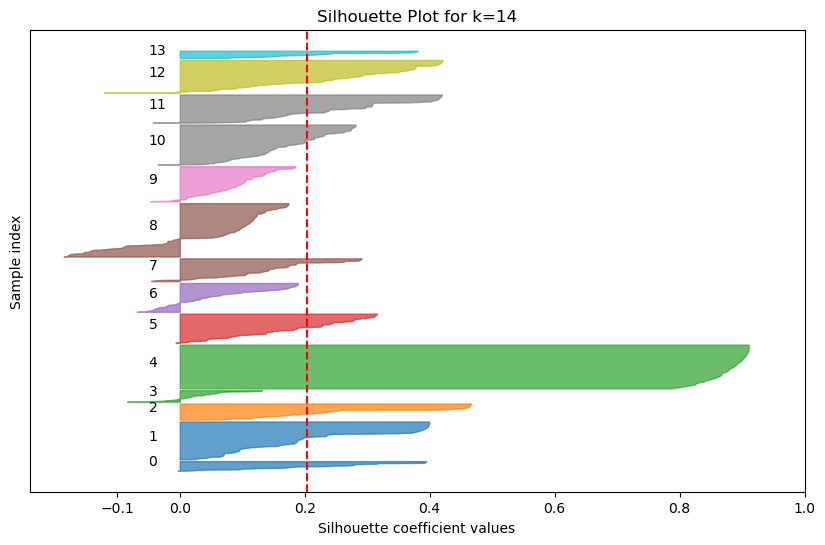

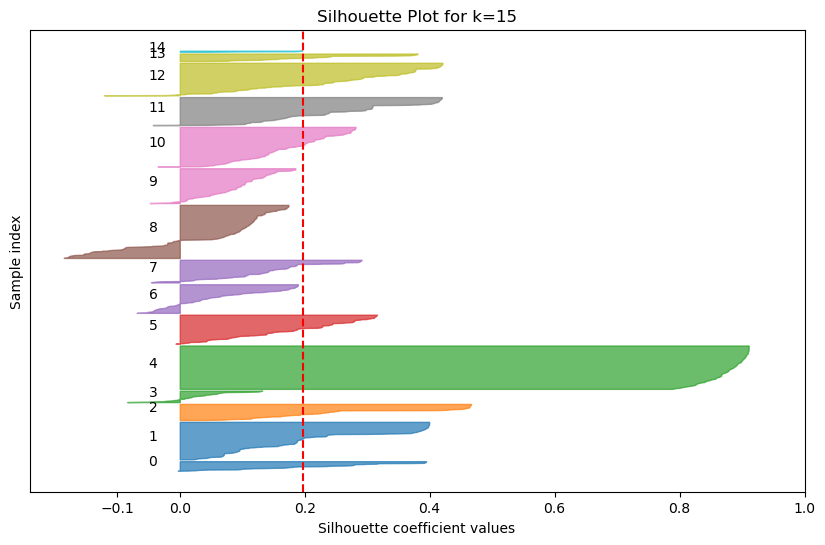

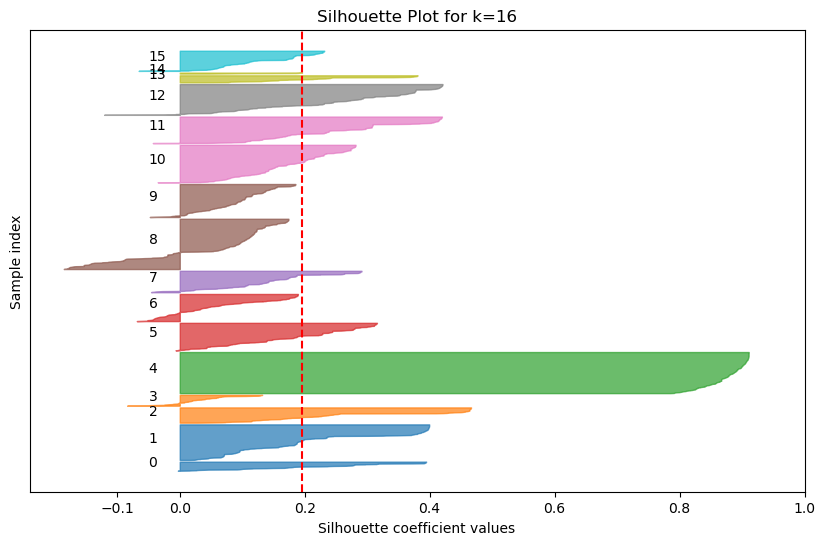

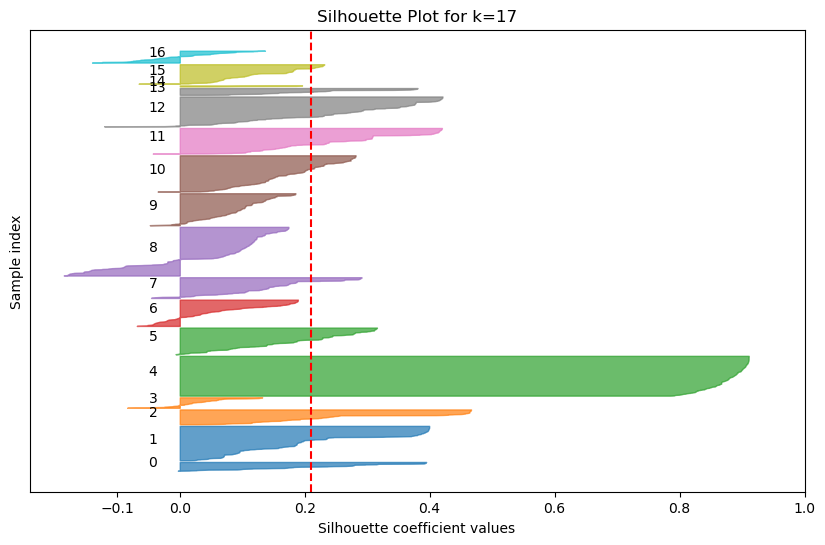

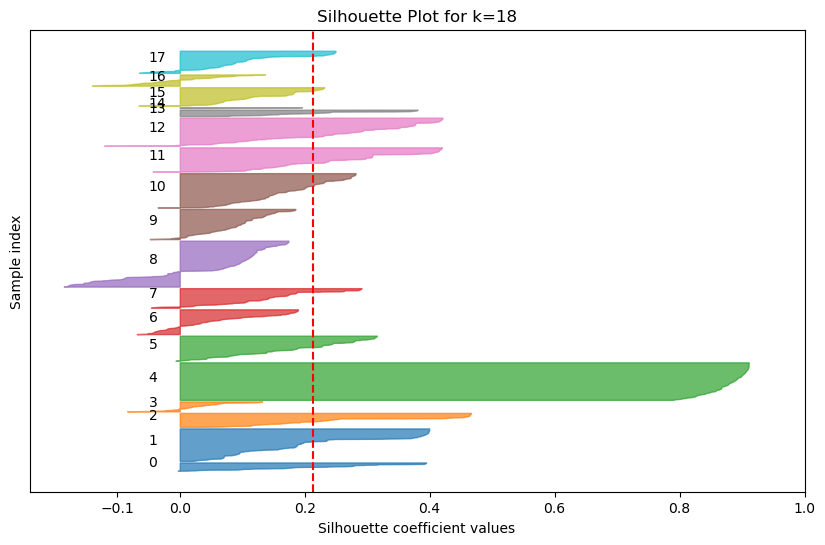

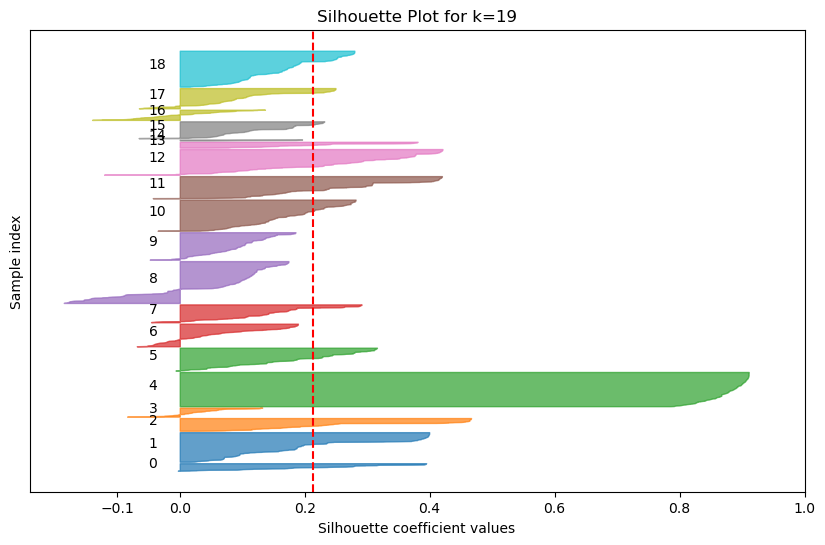

IndexError: range object index out of range

<Figure size 1000x600 with 0 Axes>

In [64]:
for k in range(2, 20):
    # Plot silhouette samples for a specific value of k (e.g., k=4)
    k_index = k  # Index of k value in k_values list (e.g., 4 clusters -> index 2)
    plt.figure(figsize=(10, 6))
    plt.title(f"Silhouette Plot for k={k_values[k_index]}")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Sample index")
    y_lower = 10
    for i in range(k_values[k_index]):
        # Aggregate silhouette scores for samples belonging to cluster i and sort them
        ith_cluster_silhouette_values = [sample_silhouette_values[j] for j, label in enumerate(cluster_labels) if label == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = len(ith_cluster_silhouette_values)
        y_upper = y_lower + size_cluster_i
        color = plt.cm.tab10(float(i) / k_values[k_index])
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    plt.axvline(x=silhouette_scores[k_index], color="red", linestyle="--")
    plt.yticks([])
    plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()

<Axes: xlabel='index'>

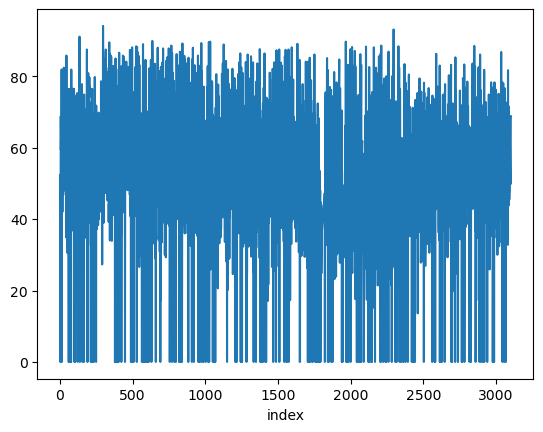

In [71]:
dif_df['acceptance-rate'].plot()

(array([180.,   0.,  10.,  39., 100., 221., 337., 417., 388., 403., 350.,
        250., 164., 128.,  26.]),
 array([ 0.        ,  6.27333333, 12.54666667, 18.82      , 25.09333333,
        31.36666667, 37.64      , 43.91333333, 50.18666667, 56.46      ,
        62.73333333, 69.00666667, 75.28      , 81.55333333, 87.82666667,
        94.1       ]),
 <BarContainer object of 15 artists>)

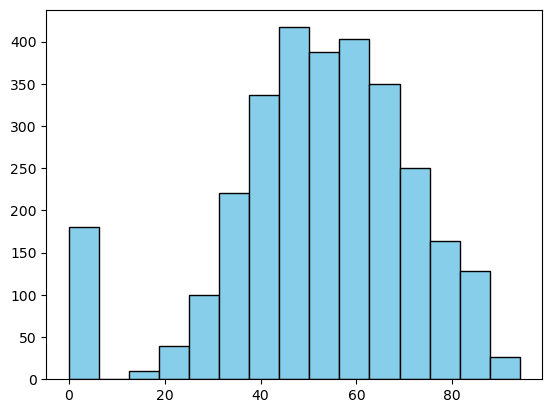

In [74]:
plt.hist(dif_df['acceptance-rate'], bins=15, color='skyblue', edgecolor='black')

In [65]:
km = KMeans(n_clusters=14, random_state=0)
cl = km.fit_predict(data)

In [66]:
def getUniqueTopics(dataframe):
    topics = []
    for _, row in dataframe.iterrows():
        if type(row['topics']) == str:
            topics += row['topics'].split(',')
    return np.unique(topics)

In [68]:
def getClusterData(dataset,n, cluster_topics):
    data = []
    for _, row in dataset.iterrows():
        if row['difficulty_score'] is np.NaN:
            print('prob')
        if not row['difficulty_score'] or row['difficulty_score'] == 0: continue

        prob = np.zeros(n + 1)
        prob[0] = row['difficulty_score']
        for topic in row['topics'].split(','):
            x = np.where(cluster_topics == topic)
            prob[x[0][0] + 1] = 1

        data.append(prob)
    return data

In [71]:
cluster_4 = final_df[cl == 4]
cluster_4_topics = getUniqueTopics(cluster_4)
cluster_4_data_for_knn = getClusterData(cluster_4, len(cluster_4_topics), cluster_4_topics)

In [47]:
import warnings
warnings.filterwarnings("ignore")

In [72]:
def performClusterAnalysis(num):
    cluster_4 = final_df[cl == num]
    cluster_4_topics = getUniqueTopics(cluster_4)
    print(cluster_4_topics)
    print("Number of topics ", len(cluster_4_topics))
    print("Difficulty Level ", cluster_4['difficulty'].unique())
    cluster_4_data_for_knn = getClusterData(cluster_4, len(cluster_4_topics), cluster_4_topics)
    # Define a range of k values (number of clusters) to evaluate
    k_values = range(2, 20)

    # Initialize lists to store silhouette scores and sample silhouettes
    silhouette_scores = []
    sample_silhouettes = []

    plt.hist(cluster_4['difficulty_score'], bins=100, color='skyblue', edgecolor='black')
    plt.show()

    # Iterate over each value of k
    for k in k_values:
        # Perform k-means clustering
        kmeans = KMeans(n_clusters=k, random_state=0)
        cluster_labels = kmeans.fit_predict(cluster_4_data_for_knn)
        
        # Calculate silhouette score
        silhouette_avg = silhouette_score(cluster_4_data_for_knn, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        
        # Calculate silhouette samples for each data point
        sample_silhouette_values = silhouette_samples(cluster_4_data_for_knn, cluster_labels)
        sample_silhouettes.append(sample_silhouette_values)
        
    # Plot silhouette scores
    plt.plot(k_values, silhouette_scores, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score for Optimal K')
    plt.xticks(k_values)
    plt.show()

In [89]:
final_df[cl==3].describe()

,acceptance-rate,cluster,difficulty_score
count,182.000000,182.000000,182.000000
mean,55.038462,2.302198,0.402585
std,14.812775,2.690662,0.163183
min,16.700000,0.000000,0.083500
25%,44.225000,0.000000,0.300000
50%,55.450000,1.000000,0.364375
75%,65.000000,6.000000,0.500000
max,94.500000,10.000000,0.880000


In [92]:
final_df[cl == 3]['difficulty'].value_counts()

Medium    90
Hard      62
Easy      30
Name: difficulty, dtype: int64

(array([ 1.,  0.,  1.,  0.,  4.,  2.,  5.,  3.,  7.,  0.,  8.,  5.,  4.,
        21.,  6.,  9., 12.,  4.,  6.,  4.,  8.,  7.,  6.,  6.,  3.,  3.,
         8.,  4.,  6.,  0.,  2.,  2.,  3.,  3.,  2.,  1.,  0.,  1.,  1.,
         2.,  3.,  1.,  2.,  2.,  0.,  0.,  1.,  2.,  0.,  1.]),
 array([0.0835 , 0.09943, 0.11536, 0.13129, 0.14722, 0.16315, 0.17908,
        0.19501, 0.21094, 0.22687, 0.2428 , 0.25873, 0.27466, 0.29059,
        0.30652, 0.32245, 0.33838, 0.35431, 0.37024, 0.38617, 0.4021 ,
        0.41803, 0.43396, 0.44989, 0.46582, 0.48175, 0.49768, 0.51361,
        0.52954, 0.54547, 0.5614 , 0.57733, 0.59326, 0.60919, 0.62512,
        0.64105, 0.65698, 0.67291, 0.68884, 0.70477, 0.7207 , 0.73663,
        0.75256, 0.76849, 0.78442, 0.80035, 0.81628, 0.83221, 0.84814,
        0.86407, 0.88   ]),
 <BarContainer object of 50 artists>)

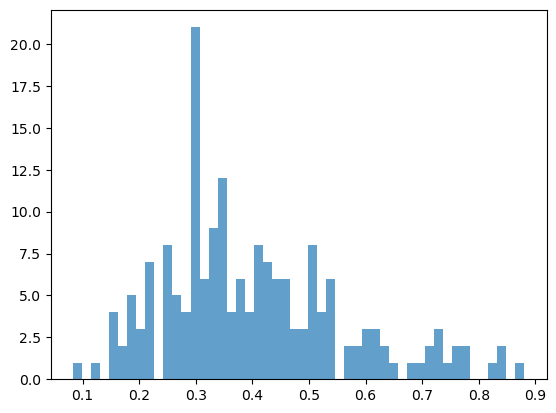

In [91]:
plt.hist(final_df[cl == 3]['difficulty_score'], bins=50, alpha=0.7)

['backtracking' 'biconnected-component' 'binary-indexed-tree'
 'binary-search' 'bit-manipulation' 'bitmask' 'brainteaser'
 'breadth-first-search' 'concurrency' 'counting' 'data-stream'
 'depth-first-search' 'design' 'divide-and-conquer' 'doubly-linked-list'
 'dynamic-programming' 'enumeration' 'eulerian-circuit' 'graph' 'greedy'
 'hash-table' 'interactive' 'linked-list' 'memoization' 'merge-sort'
 'minimum-spanning-tree' 'ordered-set' 'prefix-sum' 'queue' 'recursion'
 'segment-tree' 'shell' 'shortest-path' 'simulation' 'sorting'
 'strongly-connected-component' 'topological-sort' 'tree' 'trie'
 'two-pointers' 'union-find']
Number of topics  41
Difficulty Level  ['Medium' 'Easy' 'Hard']


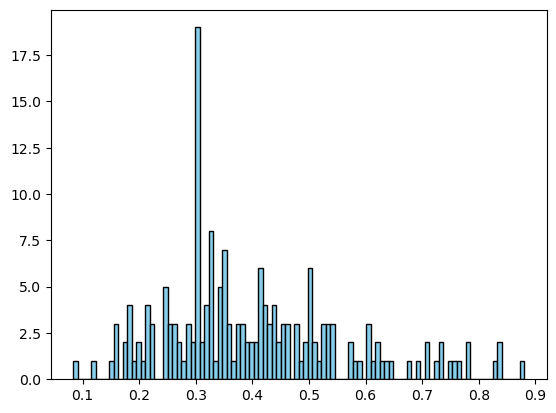

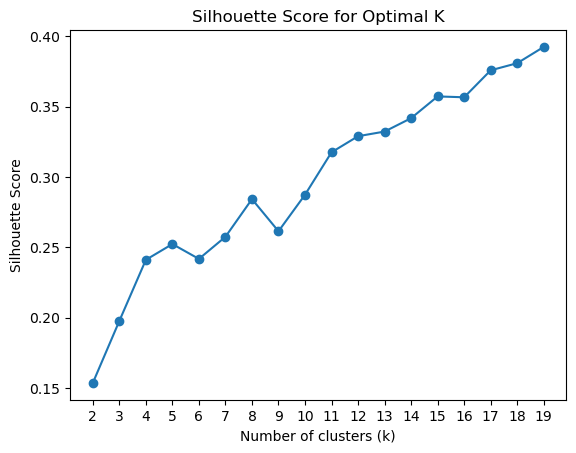

In [93]:
import numpy as np
performClusterAnalysis(3)

In [140]:
cluster_4['difficulty-level'].unique()

array([nan, 'Medium'], dtype=object)

In [112]:
cluster_4['difficulty-level'].unique()

array([nan, 'Medium'], dtype=object)

In [113]:
final_df['difficulty-level'].unique()

array([nan, 'Medium'], dtype=object)

In [175]:
difficulty_scoring = pd.read_csv('../data/problem_dataset_difficult_score.csv').set_index("name")

In [180]:
difficulty_scoring

,difficulty,link,acceptance-rate,submissions,likes,description,topics,companies,difficulty_score
name,,,,,,,,,
two-sum,Easy,https://leetcode.com/problems/two-sum,0.521,24.5M,55.7K,Given an array of integers nums and an integer...,"array,hash-table","amazon,adobe,apple,google,microsoft,bloomberg,...",0.52100
add-two-numbers,Medium,https://leetcode.com/problems/add-two-numbers,0.425,10.5M,30.4K,You are given two non-empty linked lists repre...,"linked-list,math,recursion","amazon,apple,google,adobe,bloomberg,microsoft,...",0.31875
longest-substring-without-repeating-characters,Medium,https://leetcode.com/problems/longest-substrin...,0.346,16.3M,39.1K,"Given a string s, find the length of the longe...","hash-table,string,sliding-window","amazon,apple,microsoft,bloomberg,google,facebo...",0.30000
median-of-two-sorted-arrays,Hard,https://leetcode.com/problems/median-of-two-so...,0.396,6.3M,27.8K,Given two sorted arrays nums1 and nums2 of siz...,"array,binary-search,divide-and-conquer","amazon,apple,adobe,goldman-sachs,microsoft,goo...",0.19800
longest-palindromic-substring,Medium,https://leetcode.com/problems/longest-palindro...,0.337,8.9M,28.9K,"Given a string s, return the longest\npalindro...","string,dynamic-programming","amazon,apple,microsoft,adobe,google,tiktok,fac...",0.30000
...,...,...,...,...,...,...,...,...,...
count-substrings-starting-and-ending-with-given-character,Medium,https://leetcode.com/problems/count-substrings...,0.473,66.8K,90,You are given a string s and a character c. Re...,"math,string,counting",NaN,0.35475
minimum-deletions-to-make-string-k-special,Medium,https://leetcode.com/problems/minimum-deletion...,0.424,39.3K,160,You are given a string word and an integer k.\...,"hash-table,string,greedy,sorting,counting",de-shaw,0.31800
minimum-moves-to-pick-k-ones,Hard,https://leetcode.com/problems/minimum-moves-to...,0.210,9.9K,39,"You are given a binary array nums of length n,...","array,greedy,sliding-window,prefix-sum",tiktok,0.10500


In [181]:
final_df['difficulty_score'] = difficulty_scoring['difficulty_score']

In [182]:
final_df

,difficulty,link,acceptance-rate,submissions,likes,description,topics,companies,cluster,difficulty_score
name,,,,,,,,,,
two-sum,Easy,https://leetcode.com/problems/two-sum,52.1,24.5M,55.7K,Given an array of integers nums and an integer...,"array,hash-table","amazon,adobe,apple,google,microsoft,bloomberg,...",2,0.52100
add-two-numbers,Medium,https://leetcode.com/problems/add-two-numbers,42.5,10.5M,30.4K,You are given two non-empty linked lists repre...,"linked-list,math,recursion","amazon,apple,google,adobe,bloomberg,microsoft,...",3,0.31875
longest-substring-without-repeating-characters,Medium,https://leetcode.com/problems/longest-substrin...,34.6,16.3M,39.1K,"Given a string s, find the length of the longe...","hash-table,string,sliding-window","amazon,apple,microsoft,bloomberg,google,facebo...",9,0.30000
median-of-two-sorted-arrays,Hard,https://leetcode.com/problems/median-of-two-so...,39.6,6.3M,27.8K,Given two sorted arrays nums1 and nums2 of siz...,"array,binary-search,divide-and-conquer","amazon,apple,adobe,goldman-sachs,microsoft,goo...",4,0.19800
longest-palindromic-substring,Medium,https://leetcode.com/problems/longest-palindro...,33.7,8.9M,28.9K,"Given a string s, return the longest\npalindro...","string,dynamic-programming","amazon,apple,microsoft,adobe,google,tiktok,fac...",8,0.30000
...,...,...,...,...,...,...,...,...,...,...
count-substrings-starting-and-ending-with-given-character,Medium,https://leetcode.com/problems/count-substrings...,47.3,66.8K,90,You are given a string s and a character c. Re...,"math,string,counting",NaN,8,0.35475
minimum-deletions-to-make-string-k-special,Medium,https://leetcode.com/problems/minimum-deletion...,42.4,39.3K,160,You are given a string word and an integer k.\...,"hash-table,string,greedy,sorting,counting",de-shaw,9,0.31800
minimum-moves-to-pick-k-ones,Hard,https://leetcode.com/problems/minimum-moves-to...,21.0,9.9K,39,"You are given a binary array nums of length n,...","array,greedy,sliding-window,prefix-sum",tiktok,10,0.10500


In [2]:
import pandas as pd
final_df = pd.read_csv('../data/problem-dataset-with-11-cluster.csv').set_index("name")

In [3]:
final_df

,difficulty,link,acceptance-rate,submissions,likes,description,topics,companies,cluster,difficulty_score
name,,,,,,,,,,
two-sum,Easy,https://leetcode.com/problems/two-sum,52.1,24.5M,55.7K,Given an array of integers nums and an integer...,"array,hash-table","amazon,adobe,apple,google,microsoft,bloomberg,...",2,0.52100
add-two-numbers,Medium,https://leetcode.com/problems/add-two-numbers,42.5,10.5M,30.4K,You are given two non-empty linked lists repre...,"linked-list,math,recursion","amazon,apple,google,adobe,bloomberg,microsoft,...",3,0.31875
longest-substring-without-repeating-characters,Medium,https://leetcode.com/problems/longest-substrin...,34.6,16.3M,39.1K,"Given a string s, find the length of the longe...","hash-table,string,sliding-window","amazon,apple,microsoft,bloomberg,google,facebo...",9,0.30000
median-of-two-sorted-arrays,Hard,https://leetcode.com/problems/median-of-two-so...,39.6,6.3M,27.8K,Given two sorted arrays nums1 and nums2 of siz...,"array,binary-search,divide-and-conquer","amazon,apple,adobe,goldman-sachs,microsoft,goo...",4,0.19800
longest-palindromic-substring,Medium,https://leetcode.com/problems/longest-palindro...,33.7,8.9M,28.9K,"Given a string s, return the longest\npalindro...","string,dynamic-programming","amazon,apple,microsoft,adobe,google,tiktok,fac...",8,0.30000
...,...,...,...,...,...,...,...,...,...,...
count-substrings-starting-and-ending-with-given-character,Medium,https://leetcode.com/problems/count-substrings...,47.3,66.8K,90,You are given a string s and a character c. Re...,"math,string,counting",NaN,8,0.35475
minimum-deletions-to-make-string-k-special,Medium,https://leetcode.com/problems/minimum-deletion...,42.4,39.3K,160,You are given a string word and an integer k.\...,"hash-table,string,greedy,sorting,counting",de-shaw,9,0.31800
minimum-moves-to-pick-k-ones,Hard,https://leetcode.com/problems/minimum-moves-to...,21.0,9.9K,39,"You are given a binary array nums of length n,...","array,greedy,sliding-window,prefix-sum",tiktok,10,0.10500


In [15]:
def predictScore(seqs):
    suggest = None
    clusters = []
    for prob in seqs:
        if prob not in final_df.index: continue 
        
        clusters.append(final_df['cluster'])
        cluster_no = final_df['cluster']
        if suggest is None:
            suggest = abs(final_df[final_df['cluster'] == cluster_no]['difficulty_score'] - final_df.loc[prob]['difficulty_score'])
        else:
            suggest = suggest.append(abs(final_df[final_df['cluster'] == cluster_no]['difficulty_score'] - final_df.loc[prob]['difficulty_score']))
            

    suggest = suggest.sort_values()
    return suggest.index.values[:10]

    
           


In [12]:
final_df.loc['remove-element']

difficulty                                                       Easy
link                     https://leetcode.com/problems/remove-element
acceptance-rate                                                  56.4
submissions                                                      4.9M
likes                                                            2.2K
description         Given an integer array nums and an integer val...
topics                                             array,two-pointers
companies           adobe,apple,amazon,bloomberg,uber,facebook,goo...
cluster                                                             4
difficulty_score                                                0.564
Name: remove-element, dtype: object

In [16]:
predictScore(["remove-element", "remove-duplicates-from-sorted-array"])

/var/folders/pk/w6h5h66j3y326fzy7tzbn55c0000gn/T/ipykernel_98712/4099924411.py:12: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  suggest = suggest.append(abs(final_df[final_df['cluster'] == cluster_no]['difficulty_score'] - final_df.loc[prob]['difficulty_score']))


array(['minimum-index-sum-of-two-lists', 'remove-element',
       'intersection-of-two-arrays-ii',
       'elements-in-array-after-removing-and-replacing-elements',
       'remove-duplicates-from-sorted-array',
       'path-in-zigzag-labelled-binary-tree',
       'number-of-trusted-contacts-of-a-customer',
       'count-strictly-increasing-subarrays',
       'pizza-toppings-cost-analysis', 'find-all-duplicates-in-an-array'],
      dtype=object)

In [4]:
temp = abs(final_df[final_df['cluster'] == 4]['difficulty_score'] - 0.1)

In [5]:
temp.append(final_df[final_df['cluster'] == 3]['difficulty_score'])

/var/folders/pk/w6h5h66j3y326fzy7tzbn55c0000gn/T/ipykernel_98712/1906943963.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp.append(final_df[final_df['cluster'] == 3]['difficulty_score'])


name
median-of-two-sorted-arrays                              0.09800
remove-duplicates-from-sorted-array                      0.45200
remove-element                                           0.46400
next-permutation                                         0.20000
search-in-rotated-sorted-array                           0.20450
                                                          ...   
find-the-number-of-ways-to-place-people-i                0.30225
find-the-number-of-ways-to-place-people-ii               0.24150
count-numbers-with-unique-digits-ii                      0.88000
find-the-largest-area-of-square-inside-two-rectangles    0.33300
find-the-sum-of-encrypted-integers                       0.72100
Name: difficulty_score, Length: 776, dtype: float64

In [6]:
temp.sort_values()

name
minimum-reverse-operations                0.0180
distribute-elements-into-two-arrays-ii    0.0270
shortest-subarray-with-sum-at-least-k     0.0300
handling-sum-queries-after-update         0.0350
sum-of-total-strength-of-wizards          0.0385
                                           ...  
number-of-employees-who-met-the-target    0.7760
richest-customer-wealth                   0.7780
shuffle-the-array                         0.7840
build-array-from-permutation              0.7960
concatenation-of-array                    0.7970
Name: difficulty_score, Length: 438, dtype: float64

In [15]:
final_df[final_df['cluster'] == 4]['difficulty_score']

name
median-of-two-sorted-arrays                                    0.19800
remove-duplicates-from-sorted-array                            0.55200
remove-element                                                 0.56400
next-permutation                                               0.30000
search-in-rotated-sorted-array                                 0.30450
                                                                ...   
minimum-operations-to-exceed-threshold-value-ii                0.30000
distribute-elements-into-two-arrays-i                          0.71400
count-submatrices-with-top-left-element-and-sum-less-than-k    0.43950
distribute-elements-into-two-arrays-ii                         0.12700
maximum-increasing-triplet-value                               0.33675
Name: difficulty_score, Length: 438, dtype: float64

In [20]:
temp = temp[temp.notna()]

In [21]:
temp

Series([], Name: difficulty_score, dtype: float64)

In [24]:
temp[temp.notna()]

Series([], Name: difficulty_score, dtype: float64)